## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv("BA_Clean_DataSet.csv")

## Droping Columns

In [3]:
df.head()

,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Inflight_Entertainment,Ground_Service,Wifi_and_Connectivity,Value_for_Money,Score,Approval_Status,Review,Review_Type,From,To,Transfer
0,Business Class,3.0,3.0,NaN,NaN,1.0,NaN,1,1,Trip Verified,My daughter and I were denied boarding on ou...,Good,Madrid,Vancouver,London
1,Business Class,3.0,5.0,4.0,NaN,2.0,NaN,5,8,Trip Verified,Despite boarding being the usual free for all...,Good,London,Santiago,NaN
2,Business Class,NaN,NaN,NaN,NaN,1.0,NaN,1,1,Not Verified,"Flight cancelled, no crew! 9th September 202...",Bad,London/Heathrow,Faro,NaN
3,Economy Class,3.0,1.0,1.0,1.0,3.0,1.0,3,1,Not Verified,"The worst service ever, my baggage did not a...",Bad,Kuwait,Lisbon,London
4,Economy Class,1.0,3.0,1.0,1.0,1.0,1.0,1,1,Trip Verified,4/4 flights we booked this holiday were dela...,Bad,London,Munich,NaN


Wifi_and_Connectivity sütunu çok fazla NaN değer içeriyor. Bu yüzden modeli kötü etkilememesi için dataframe'den çıkarılmalı.

In [4]:
df.describe()

,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Inflight_Entertainment,Ground_Service,Wifi_and_Connectivity,Value_for_Money,Score
count,915.000000,908.000000,788.000000,540.000000,943.000000,282.000000,1000.000000,1000.000000
mean,2.783607,3.205947,2.705584,2.803704,2.656416,2.248227,2.429000,4.183000
std,1.387327,1.525414,1.481652,1.471556,1.545035,1.528640,1.489019,3.321829
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


Aynı şekilde Inflight_Entertainment sütunu da hem düşük korelasyon hem de fazla NaN değerleri yüzünden dataframe'den çıkarılmalı

In [5]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()["Score"].sort_values()

Inflight_Entertainment    0.600830
Wifi_and_Connectivity     0.650293
Cabin_Staff_Service       0.712291
Seat_Comfort              0.722929
Food_and_Beverages        0.751700
Ground_Service            0.771129
Value_for_Money           0.892979
Score                     1.000000
Name: Score, dtype: float64

In [6]:
df.drop("Wifi_and_Connectivity", axis=1, inplace=True)
df.drop("Inflight_Entertainment", axis=1, inplace=True)

In [7]:
df.head()

,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Ground_Service,Value_for_Money,Score,Approval_Status,Review,Review_Type,From,To,Transfer
0,Business Class,3.0,3.0,NaN,1.0,1,1,Trip Verified,My daughter and I were denied boarding on ou...,Good,Madrid,Vancouver,London
1,Business Class,3.0,5.0,4.0,2.0,5,8,Trip Verified,Despite boarding being the usual free for all...,Good,London,Santiago,NaN
2,Business Class,NaN,NaN,NaN,1.0,1,1,Not Verified,"Flight cancelled, no crew! 9th September 202...",Bad,London/Heathrow,Faro,NaN
3,Economy Class,3.0,1.0,1.0,3.0,3,1,Not Verified,"The worst service ever, my baggage did not a...",Bad,Kuwait,Lisbon,London
4,Economy Class,1.0,3.0,1.0,1.0,1,1,Trip Verified,4/4 flights we booked this holiday were dela...,Bad,London,Munich,NaN


Encode edilemeyecek değerler de modelden çıkarılmalı. (Review, From, To, Trasnfer)

In [8]:
df.drop("Review", axis=1, inplace=True)
df.drop("From", axis=1, inplace=True)
df.drop("To", axis=1, inplace=True)
df.drop("Transfer", axis=1, inplace=True)

In [9]:
df.head()

,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Ground_Service,Value_for_Money,Score,Approval_Status,Review_Type
0,Business Class,3.0,3.0,NaN,1.0,1,1,Trip Verified,Good
1,Business Class,3.0,5.0,4.0,2.0,5,8,Trip Verified,Good
2,Business Class,NaN,NaN,NaN,1.0,1,1,Not Verified,Bad
3,Economy Class,3.0,1.0,1.0,3.0,3,1,Not Verified,Bad
4,Economy Class,1.0,3.0,1.0,1.0,1,1,Trip Verified,Bad


## Filling of Nan Values

In [10]:
df.describe()

,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Ground_Service,Value_for_Money,Score
count,915.000000,908.000000,788.000000,943.000000,1000.000000,1000.000000
mean,2.783607,3.205947,2.705584,2.656416,2.429000,4.183000
std,1.387327,1.525414,1.481652,1.545035,1.489019,3.321829
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [11]:
df.isna().sum()

Seat_Type                0
Seat_Comfort            85
Cabin_Staff_Service     92
Food_and_Beverages     212
Ground_Service          57
Value_for_Money          0
Score                    0
Approval_Status          0
Review_Type              0
dtype: int64

Burada NaN değerleri, o satırın 'Score' değeri ile doldurma yöntemi tercih edilmiştir.

In [12]:
for column in df.columns:
    df[column].fillna(value=df["Score"], inplace=True)

In [13]:
df.describe()

,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Ground_Service,Value_for_Money,Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.670000,3.044000,2.600000,2.584000,2.429000,4.183000
std,1.439852,1.597691,1.753018,1.558002,1.489019,3.321829
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,5.000000,10.000000


In [14]:
df.isna().sum()

Seat_Type              0
Seat_Comfort           0
Cabin_Staff_Service    0
Food_and_Beverages     0
Ground_Service         0
Value_for_Money        0
Score                  0
Approval_Status        0
Review_Type            0
dtype: int64

## Encoding

In [15]:
df['Approval_Status'] = df['Approval_Status'].map({'Trip Verified': 1, 'Not Verified': 0})

In [16]:
df.head()

,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Ground_Service,Value_for_Money,Score,Approval_Status,Review_Type
0,Business Class,3.0,3.0,1.0,1.0,1,1,1.0,Good
1,Business Class,3.0,5.0,4.0,2.0,5,8,1.0,Good
2,Business Class,1.0,1.0,1.0,1.0,1,1,0.0,Bad
3,Economy Class,3.0,1.0,1.0,3.0,3,1,0.0,Bad
4,Economy Class,1.0,3.0,1.0,1.0,1,1,1.0,Bad


In [17]:
df['Seat_Type'] = df['Seat_Type'].map({'Economy Class': 0, 'Business Class': 1, 'Premium Economy': 2, 'First Class': 3})

In [18]:
df.head()

,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Ground_Service,Value_for_Money,Score,Approval_Status,Review_Type
0,1,3.0,3.0,1.0,1.0,1,1,1.0,Good
1,1,3.0,5.0,4.0,2.0,5,8,1.0,Good
2,1,1.0,1.0,1.0,1.0,1,1,0.0,Bad
3,0,3.0,1.0,1.0,3.0,3,1,0.0,Bad
4,0,1.0,3.0,1.0,1.0,1,1,1.0,Bad


## Data Visualization

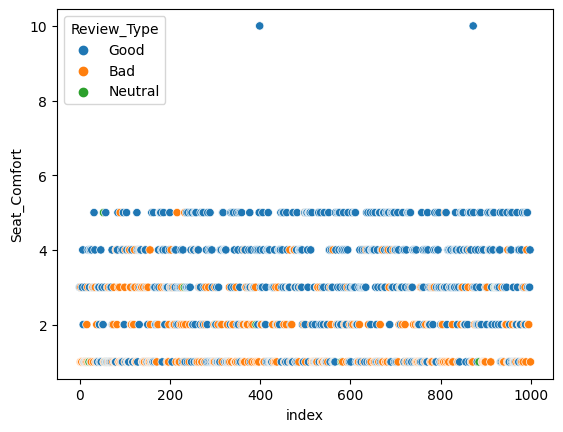

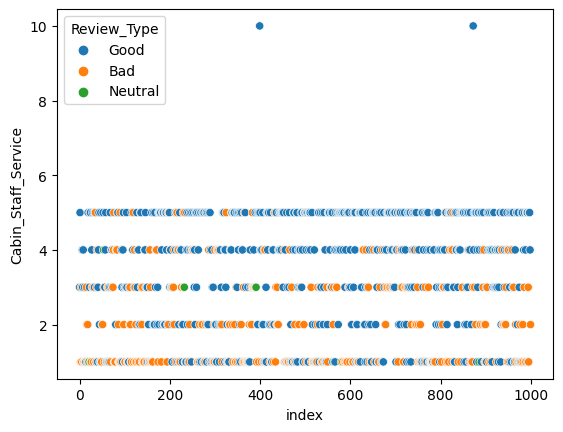

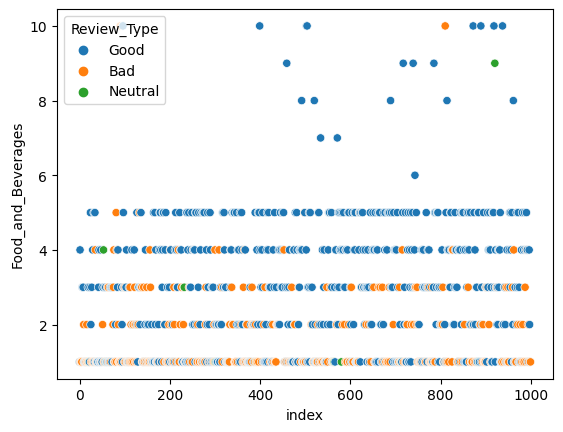

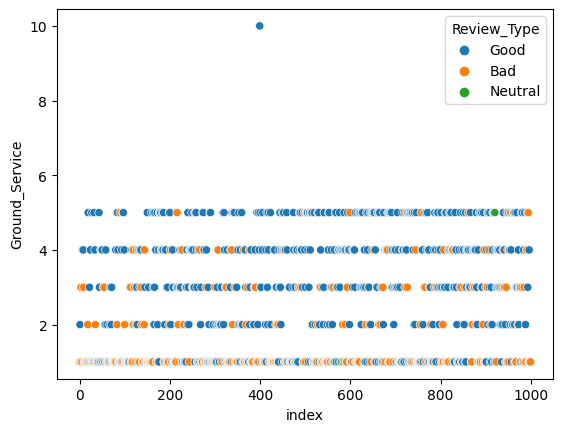

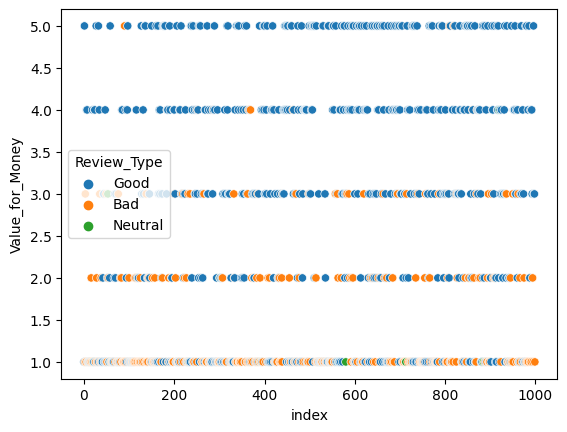

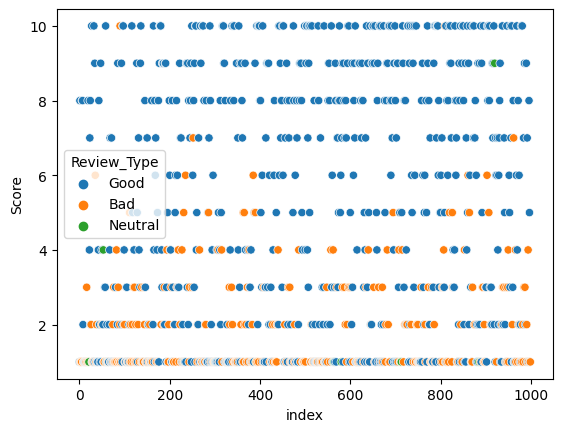

In [19]:
df.reset_index(inplace=True)
for column in df.columns[2:-2]:
    sbn.scatterplot(data=df, x="index", y=column, hue="Review_Type")
    plt.show()

In [20]:
df = df[df['Seat_Comfort'] <= 5]

In [21]:
df = df[df['Food_and_Beverages'] <= 5]

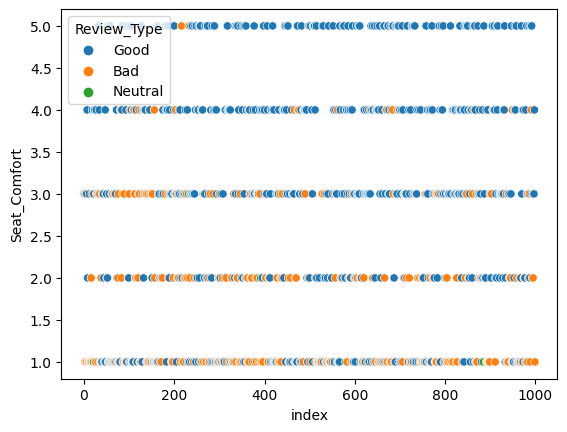

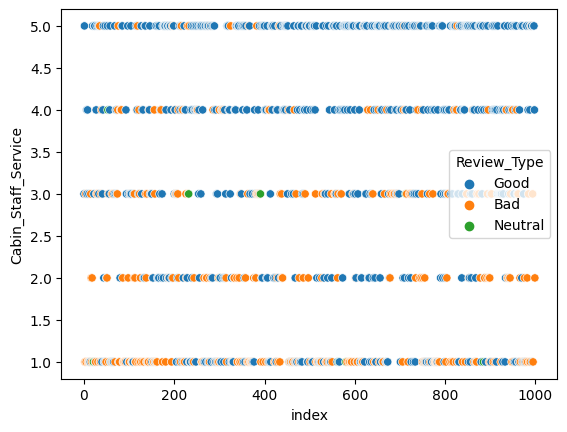

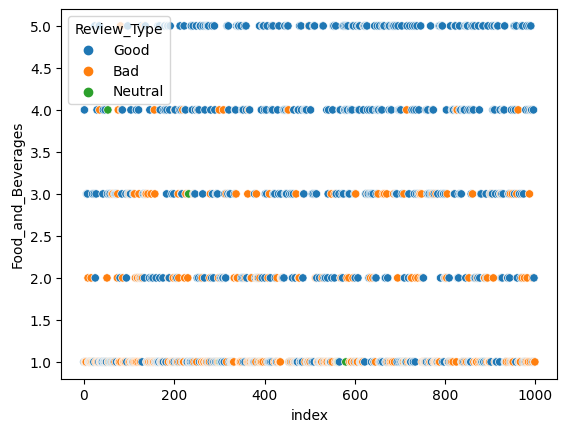

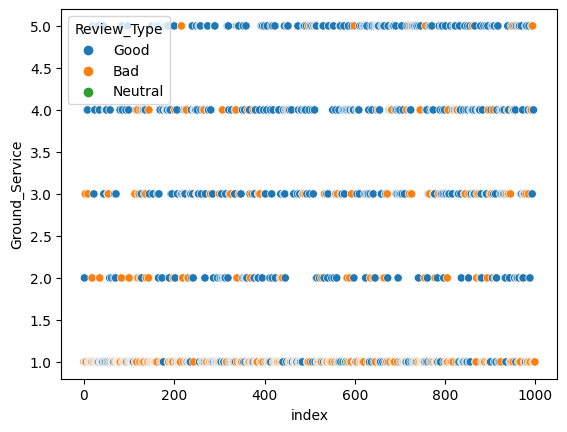

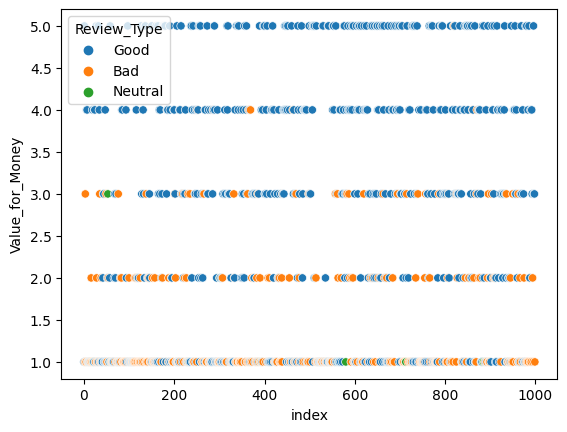

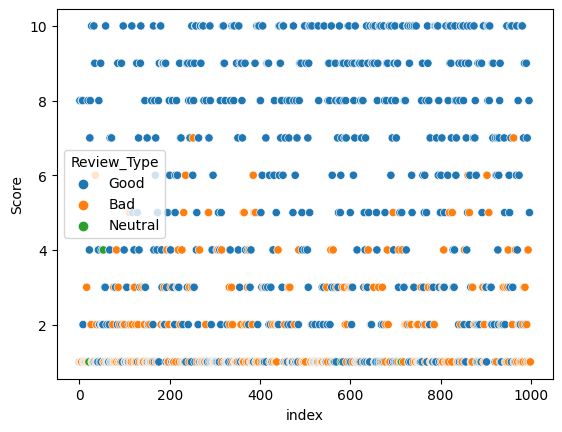

In [22]:
for column in df.columns[2:-2]:
    sbn.scatterplot(data=df, x="index", y=column, hue="Review_Type")
    plt.show()

## Class Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [26]:
df["Review_Type"] = le.fit_transform(df["Review_Type"])

In [27]:
df.head()

,index,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Ground_Service,Value_for_Money,Score,Approval_Status,Review_Type
0,0,1,3.0,3.0,1.0,1.0,1,1,1.0,1
1,1,1,3.0,5.0,4.0,2.0,5,8,1.0,1
2,2,1,1.0,1.0,1.0,1.0,1,1,0.0,0
3,3,0,3.0,1.0,1.0,3.0,3,1,0.0,0
4,4,0,1.0,3.0,1.0,1.0,1,1,1.0,0


## Final Data Checks

In [28]:
df.isna().sum()

index                  0
Seat_Type              0
Seat_Comfort           0
Cabin_Staff_Service    0
Food_and_Beverages     0
Ground_Service         0
Value_for_Money        0
Score                  0
Approval_Status        2
Review_Type            0
dtype: int64

In [29]:
df.dropna(subset=['Approval_Status'], inplace=True)

In [32]:
df.drop("index", axis=1, inplace=True)

In [34]:
df.dtypes

Seat_Type                int64
Seat_Comfort           float64
Cabin_Staff_Service    float64
Food_and_Beverages     float64
Ground_Service         float64
Value_for_Money          int64
Score                    int64
Approval_Status        float64
Review_Type              int32
dtype: object

## Train-Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2)

In [39]:
y_test.value_counts()

Review_Type
1    131
0     62
2      2
Name: count, dtype: int64

In [40]:
y_train.value_counts()

Review_Type
1    495
0    277
2      8
Name: count, dtype: int64

# XGBoost

## Creating The Model

In [41]:
import xgboost as xgb

In [42]:
xgb_cls = xgb.XGBClassifier(objective="multiclass:softmax", num_class=3)

In [43]:
xgb_cls.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

## Prediction

In [44]:
preds = xgb_cls.predict(x_test)

In [45]:
preds

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

## Test

In [47]:
accuracy_score(y_test, preds)

0.6820512820512821

In [48]:
confusion_matrix(y_test, preds)

array([[39, 23,  0],
       [37, 94,  0],
       [ 2,  0,  0]], dtype=int64)

# TensorFlow

In [49]:
x = df.drop("Review_Type",axis=1)
y = df["Review_Type"]

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x = pd.DataFrame(x)

In [52]:
x

,0,1,2,3,4,5,6,7
0,0.333333,0.50,0.50,0.00,0.00,0.0,0.000000,1.0
1,0.333333,0.50,1.00,0.75,0.25,1.0,0.777778,1.0
2,0.333333,0.00,0.00,0.00,0.00,0.0,0.000000,0.0
3,0.000000,0.50,0.00,0.00,0.50,0.5,0.000000,0.0
4,0.000000,0.00,0.50,0.00,0.00,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...
970,0.000000,0.25,0.00,0.00,0.00,0.0,0.000000,1.0
971,0.000000,0.50,1.00,0.75,0.75,1.0,0.777778,1.0
972,0.333333,0.50,1.00,0.25,0.00,0.5,0.444444,1.0
973,0.000000,0.75,0.75,0.00,0.00,0.5,0.000000,1.0


In [68]:
y

0      1
1      1
2      0
3      0
4      0
      ..
995    0
996    1
997    1
998    1
999    0
Name: Review_Type, Length: 975, dtype: int32

In [53]:
x = x.values

In [55]:
from keras.models import Sequential
from keras.layers import Dense

In [70]:
# Create model here
model = Sequential()
model.add(Dense(units=16, input_dim = 8, activation = 'relu')) # Rectified Linear Unit Activation Function
model.add(Dense(units=16, activation = 'relu'))
model.add(Dense(units=1, activation = 'softmax')) # Softmax for multi-class classification
# Compile model here
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'mse'])

In [71]:
model.fit(x,y,epochs=100)

Epoch 1/100


C:\Users\tolgakilinckaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6421 - mse: 0.3579
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6421 - mse: 0.3579
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6421 - mse: 0.3579
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6421 - mse: 0.3579
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.6421 - mse: 0.3579
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6421 - mse: 0.3579
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6421 - mse: 0.3579
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6421 - mse: 0.3579
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0

In [72]:
loss = pd.DataFrame(model.history.history)

<Axes: >

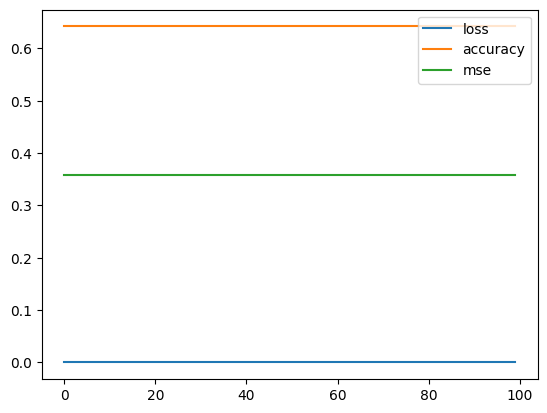

In [73]:
loss.plot()

In [67]:
model.evaluate(x,y,verbose=0)

C:\Users\tolgakilinckaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


[0.0, 0.6420512795448303]